In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import random
from sklearn.metrics import recall_score

In [2]:
data = pd.read_csv('auto_insurance_csv.csv')
df = data.copy()


display(df.head())

print("\n")
print("Dataframe shape : ",df.shape)
print("\n")

display(df.info())

print("\n")

print("fraud_reported count: ")
print("\n")

print(df.fraud_reported.value_counts())

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,0,328,48.0,521585,2014-10-17,OH,250/500,1000,1406.91,0.0,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,1,228,42.0,342868,2006-06-27,IN,250/500,2000,1197.22,5000000.0,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,2,134,29.0,687698,2000-09-06,OH,NaN,2000,1413.14,5000000.0,...,NaN,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,3,256,41.0,227811,1990-05-25,IL,NaN,2000,1415.74,6000000.0,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,4,228,44.0,367455,2014-06-06,IL,NaN,1000,1583.91,6000000.0,...,NaN,6500,1300,650,4550,Accura,RSX,2009,N,NaN




Dataframe shape :  (1000, 41)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   months_as_customer           1000 non-null   int64  
 2   age                          865 non-null    float64
 3   policy_number                1000 non-null   int64  
 4   policy_bind_date             1000 non-null   object 
 5   policy_state                 1000 non-null   object 
 6   policy_csl                   127 non-null    object 
 7   policy_deductable            1000 non-null   int64  
 8   policy_annual_premium        1000 non-null   float64
 9   umbrella_limit               802 non-null    float64
 10  insured_zip                  1000 non-null   int64  
 11  insured_sex                  1000 non-null   object 
 12  insured_education_level      1000 non-null 

None



fraud_reported count: 


N    753
Y    247
Name: fraud_reported, dtype: int64


In [3]:
df.describe()


,Unnamed: 0,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,865.000000,1000.000000,1000.000000,1000.000000,8.020000e+02,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,499.500000,203.954000,38.812717,546238.648000,1136.000000,1256.406150,1.103491e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,288.819436,115.113174,9.123361,257063.005276,611.864673,244.167395,2.299218e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,249.750000,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,499.500000,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,749.250000,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,999.000000,479.000000,64.000000,999435.000000,2000.000000,2047.590000,9.000000e+06,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [4]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ":", df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


In [5]:
# fraud_reported kolonu ile gruplayıp ilgili yaşların ortalamasıyla boş olan değerlerin doldurulması: 

df["age"] = df.groupby(['fraud_reported'])['age'].apply(lambda x: round(x.fillna(x.mean())))

bin_labels_age = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels_age, include_lowest = True)

# policy_csl değişkenindeki boş alanlar "missing" string'i ile doldurulması :

df['policy_csl'] = df.policy_csl.fillna("MISSING")

# umbrella_limit değişkenindeki 0.0 olan alanlar "NO" , 
# sıfırdan farklı sayısal bir veri içeren alanlara "YES" ,
# son olarak eksik verilerin "missing" string'i ile doldurulması : 

df['umbrella_limit'] = df.umbrella_limit.fillna("MISSING")
df['umbrella_limit'] = df['umbrella_limit'].replace(0.0, 'NO')

for i in df['umbrella_limit'].unique():
    if (i != 'MISSING') & (i != 'NO'):
        df['umbrella_limit'] = df['umbrella_limit'].replace(i, 'YES')
        
# police_report_available değişkenindeki boş satırlar "missing" string'i ile doldurulması :

df['police_report_available'] = df.police_report_available.fillna("MISSING")

# policy_bind_date ve incident_date değişkenlerinin datetime'a çevrilmesi, 
# ilgili değişkenlerin birbirlerinden çıkartılarak "claim_day_of_policy" adında yeni bir kolon oluşturulması: 

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days

# insured_hobbies kolonunda "chess" ve "cross-fit" dışındaki veriler "other" kategorisine çekilmesi : 

hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')
    
# kazanın yaşandığı yer ile poliçenin düzenlendiği yer aynı mıdır kontrolünün yapılması ve "location_check" adlı bir değişken oluşturulması : 
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)
    

# analizlerin yapıldığı yaklaşık tarih olarak "2016" baz yılı alınarak araç yaşı("vehicle_age") değişkeninin oluşturulması : 

df['vehicle_age'] = 2016 - df['auto_year'] 


In [6]:
bins_tca = [0, 10_000, 20_000, 30_000, 40_000, 50_000, 60_000, 70_000, 80_000, 90_000, 100_000, 110_000, 1_000_000]
bin_labels_tca = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100', '100-110', '110+']
df['total_claim_amount'] = pd.cut(df['total_claim_amount'], bins = bins_tca, labels = bin_labels_tca, include_lowest= True)

bins_macg = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels_macg = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']
df['months_as_customer'] = pd.cut(df['months_as_customer'], bins = bins_macg, labels = bin_labels_macg, include_lowest= True)

bins_papg = list(np.linspace(0,2500, 6, dtype = int))
bin_labels_papg = ['very low', 'low', 'medium', 'high', 'very high']
df['policy_annual_premium'] = pd.cut(df['policy_annual_premium'], bins = bins_papg, labels=bin_labels_papg)

bins_pdg = list(np.linspace(0,2000, 5, dtype = int))
bin_labels_pdg = ['0-500', '501-1000', '1001-1500', '1501-2000']
df['policy_deductable'] = pd.cut(df['policy_deductable'], bins = bins_pdg, labels = bin_labels_pdg)

# hedef değişkenin 0 ve 1 olarak dönüştürülmesi : 

df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

# gereksiz kolonların veri setimizden çıkartılması : 

df = df.drop(['_c39','Unnamed: 0','age','policy_bind_date','incident_date','policy_number','incident_location','auto_model','insured_zip',"auto_year"], axis = 1)

In [7]:
df.shape 

(1000, 35)

In [8]:
df.isnull().sum()

months_as_customer             0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
fraud_repo

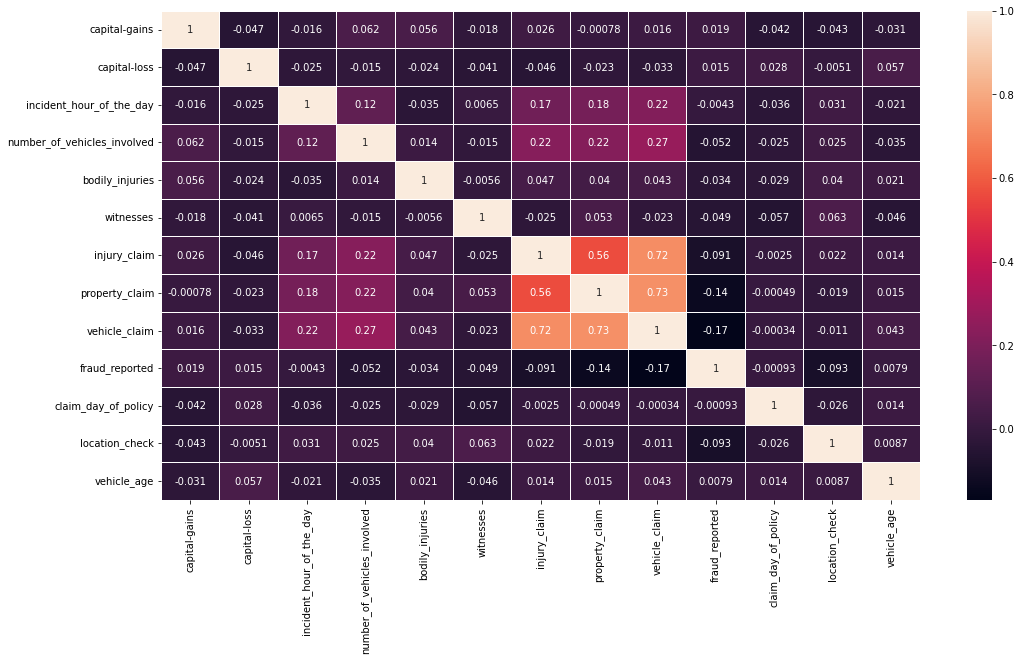

In [9]:
corr = df.corr()
plt.figure(figsize = (17, 9))
sns.heatmap(data = corr, annot = True, linewidth = 1)
plt.show()

####  Korelasyon matrisinden,  `vehicle claim` , `total_claim_amount` , `property_claim` ve `injury_claim` arasında yüksek bir korelasyon olduğunu görmekteyiz. 
#### Çünkü total_claim_amount `vehicle claim`,`property_claim` ve `injury_claim` sütunlarının toplamını vermektedir.

#### total_claim_amount bilgilerini elde edip geriye kalan 3 değişken veri setimizden çıkarılacaktır. 

In [10]:
df = df.drop(['vehicle_claim', 'property_claim', 'injury_claim'], axis = 1)


In [11]:
df.columns

Index(['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'auto_make',
       'fraud_reported', 'age_group', 'claim_day_of_policy', 'location_check',
       'vehicle_age'],
      dtype='object')

In [12]:
# hedef değişken ve geriye kalan bağımsız değişkenleri ayırma : 

y = df.fraud_reported
X = df.drop('fraud_reported', axis=1)

## train-test-validation set ayrıştırılması : 


In [13]:
# veri seti eğitim ve test veri seti olarak ikiye ayrılır :

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [15]:
cat_cols = ['age_group', 'months_as_customer', 'policy_deductable','location_check','policy_annual_premium','total_claim_amount']
for col in cat_cols:
    df[col] = df[col].astype('object')

columns_to_encode = []
if df[col].dtype == 'object':
    columns_to_encode.append(col)
    
num_cols = list(df[["capital-loss","capital-gains","incident_hour_of_the_day"]])
num_cols

['capital-loss', 'capital-gains', 'incident_hour_of_the_day']

## Scaling

In [16]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train[num_cols]))
X_test_sc= pd.DataFrame(scaler.transform(X_test[num_cols]))

## Encoding 


In [17]:
from sklearn.preprocessing import OneHotEncoder

_encoder = OneHotEncoder(handle_unknown='ignore')

In [18]:
X_train_en = pd.DataFrame( _encoder.fit_transform(X_train[columns_to_encode]).toarray(), columns=_encoder.get_feature_names())
X_test_en = pd.DataFrame( _encoder.transform(X_test[columns_to_encode]).toarray(), columns=_encoder.get_feature_names())

In [19]:
X_train = pd.concat([X_train_sc, X_train_en], axis=1)
X_test = pd.concat([X_test_sc, X_test_en], axis=1)

## SAMPLING

In [20]:
oversample = SMOTE(random_state=9)
X_res, y_res = oversample.fit_resample(X_train, y_train)

/home/merve/notebook/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

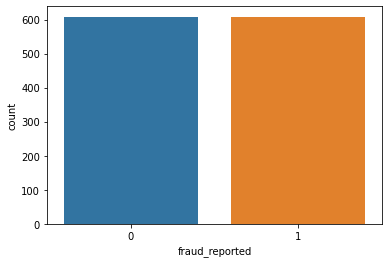

In [21]:
chck = pd.DataFrame()
chck['fraud_reported'] = y_res

sns.countplot(chck['fraud_reported'])

## Random Forest


In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=25, random_state=12)
rfc.fit(X_res, y_res)
y_pred = rfc.predict(X_test)


Training Accuracy:  0.96625
Testing Accuarcy:  0.62


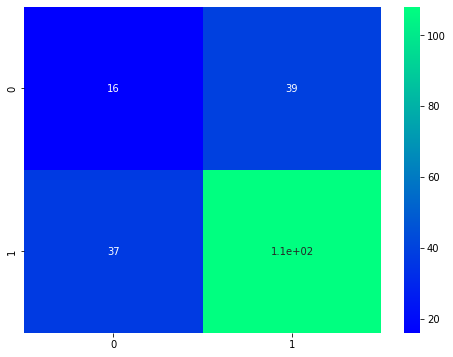

              precision    recall  f1-score   support

           0       0.30      0.29      0.30        55
           1       0.73      0.74      0.74       145

    accuracy                           0.62       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.62      0.62      0.62       200



In [23]:
print("Training Accuracy: ", rfc.score(X_train, y_train))
print('Testing Accuarcy: ', rfc.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

## Decision Tree

In [24]:
dtc = DecisionTreeClassifier()

dtc.fit(X_res, y_res)
y_pred = dtc.predict(X_test)

Training Accuracy:  0.96625
Testing Accuarcy:  0.565


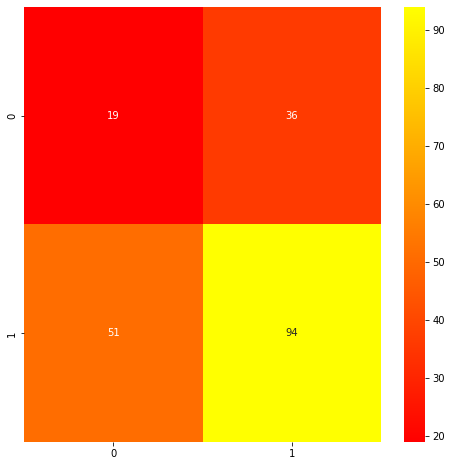

              precision    recall  f1-score   support

           0       0.27      0.35      0.30        55
           1       0.72      0.65      0.68       145

    accuracy                           0.56       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.60      0.56      0.58       200



In [25]:
print("Training Accuracy: ", dtc.score(X_train, y_train))
print('Testing Accuarcy: ', dtc.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'autumn')
plt.show()

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

## SVC

In [26]:

svc = SVC(kernel='linear')
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

Training Accuracy:  0.4975
Testing Accuarcy:  0.53


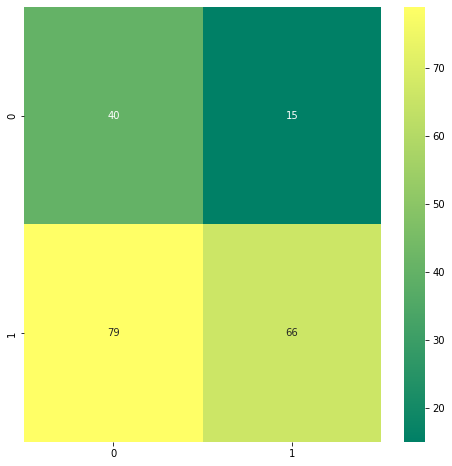

              precision    recall  f1-score   support

           0       0.34      0.73      0.46        55
           1       0.81      0.46      0.58       145

    accuracy                           0.53       200
   macro avg       0.58      0.59      0.52       200
weighted avg       0.68      0.53      0.55       200



In [27]:
print("Training Accuracy: ", svc.score(X_train, y_train))
print('Testing Accuarcy: ', svc.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'summer')
plt.show()

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [28]:
# Ensemble Classifier
from imblearn.ensemble import EasyEnsembleClassifier 

model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

model1.fit(X_res, y_res)
y_pred_ef = model1.predict(X_test)


Training Accuracy:  0.5925
Testing Accuarcy:  0.59


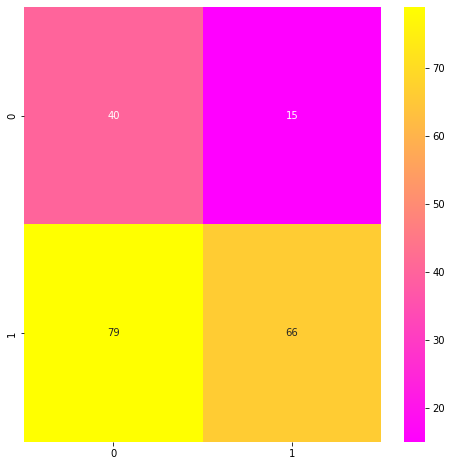

              precision    recall  f1-score   support

           0       0.34      0.73      0.46        55
           1       0.81      0.46      0.58       145

    accuracy                           0.53       200
   macro avg       0.58      0.59      0.52       200
weighted avg       0.68      0.53      0.55       200



In [29]:
print("Training Accuracy: ", model1.score(X_train, y_train))
print('Testing Accuarcy: ', model1.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

# classification report
cr = classification_report(y_test, y_pred)
print(cr)